# EDA dan Klasifikasi

Disusun untuk memenuhi tugas Data Mining dan Warehouse
Dosen pengampu: Dr. Yudi Wibisono, S.T., M.T.

Kelompok 4
1. Natasha Adinda Cantika (2312120)
2. Futih Millati Addinillah (2309445)
3. Muhammad Ruby Pradana Syamsun (2304191)
4. Armelia Zahrah Mumtaz (2300801)
5. Syahraini Revita Puri (2301895)

## A. Pendahuluan

### 1. Latar belakang

Klasifikasi adalah salah satu teknik dalam machine learning yang bertujuan untuk memprediksi label atau kategori dari data berdasarkan fitur-fitur yang dimiliki. Misalnya, pada industri e-commerce, perusahaan dapat menggunakan model klasifikasi untuk memprediksi apakah seorang pelanggan akan melakukan pembelian berdasarkan riwayat perilaku mereka di situs web. Dengan kemampuan ini, perusahaan dapat mengoptimalkan strategi pemasaran, meningkatkan konversi, dan memaksimalkan keuntungan.

Pada tugas ini, kami berfokus pada penggunaan model klasifikasi untuk memprediksi apakah suatu sesi interaksi dengan platform tertentu akan menghasilkan pesanan atau tidak. Dengan menganalisis beberapa atribut yang dapat digunakan dalam membuat model klasifikasi. Permasalahan utama dalam tugas ini adalah untuk membangun model prediksi yang paling akurat untuk mengidentifikasi peluang pembeli melakukan order atau tidak.

Sebelum melakukan pembuatan model, tentu saja kita tidak boleh melewati langkah krusial pertama untuk efisiensi yaitu, preprocessing. Kami menerapkan beberapa metode machine learning, seperti Random Forest dan XGboost dengan bantuan library Scikit Learn. Setelah pembuatan model selesai, tentunya setiap model akan melalui evaluasi confusion matrix berdasarkan hasil prediksi masing masing model dengan metrik penilaian pada classification report guna memastikan bahwa model yang dihasilkan mampu melakukan prediksi dengan tingkat akurasi yang tinggi.

Dengan menggunakan pendekatan machine learning yang tepat, tugas klasifikasi ini tidak hanya diharapkan dapat memberikan wawasan yang lebih mendalam tentang prediksi terkait keputusan order barang oleh pembeli melalui interaksi pembeli pada platform online shopping,  tetapi juga keberhasilan dalam penyusunan tugas ini dapat memberikan pengetahuan baru kepada penyusun laporan ini.

### 2. Penjelasan atribut dan asumsi

Import dataset dengan menggunakan library gdown untuk mengimport dari google drive dan library pandas untuk membuat dataframe

In [1]:
%pip install gdown
import gdown
import pandas as pd

# Mengunduh dataset 'transact_train.csv' dan 'transact_class.csv' dari Google Drive menggunakan gdown, 
# lalu memuatnya ke dalam DataFrame pandas untuk analisis, manipulasi, dan modeling lebih lanjut.
url1 = 'https://drive.google.com/uc?id=1KIHRRdq429cT8hvlZ9WAooReVoHzb1fu'
url2 = 'https://drive.google.com/uc?id=1GLam9SxIB7Rp9CCU1AfWtB7-6ndBuAbP'

gdown.download(url1, 'transact_train.csv', quiet=False)
gdown.download(url2, 'transact_class.csv', quiet=False)

df_transact_train = pd.read_csv('transact_train.csv', sep="|")



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Downloading...
From: https://drive.google.com/uc?id=1KIHRRdq429cT8hvlZ9WAooReVoHzb1fu
To: /datasets/_deepnote_work/transact_train.csv
100%|██████████| 44.7M/44.7M [00:00<00:00, 215MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GLam9SxIB7Rp9CCU1AfWtB7-6ndBuAbP
To: /datasets/_deepnote_work/transact_class.csv
100%|██████████| 4.54M/4.54M [00:00<00:00, 160MB/s]


In [2]:
df_transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

Dapat dilihat pada dataset, terdapat 24 kolom yang merepresentasikan data pelatihan yang dibutuhkan,
1. sessionNo, sesi customer dalam berinteraksi dengan platform (integer);
2. startHour, waktu customer memulai sesi (integer);
3. startWeekday, Hari customer memulai sesi (integer {1-Mon, 2-Tue, 3-Wed, 4-Thu, 5-Fri, 6-Sat, 7-Sun});
4. duration, durasi sesi (float);
5. cCount, Jumlah click customer pada produk (integer);
6. cMinPrice, Harga minimum produk (float);
7. cMaxPrice, Harga maximum produk (float);
8. cSumPrice, Total harga produk (float);
9. bCount, Jumlah produk pada shopping basket customer (integer);
10. bMinPrice, Harga minimum produk pada shopping basket customer (float);
11. bMaxPrice, Harga maximum produk pada shopping basket customer (float);
12. bSumPrice, Total harga produk pada shopping basket customer (float);
13. bStep, step atau langkah dalam melakukan pembelian (integer {1,2,3,4,5});
14. onlineStatus, Status online customer (object);
15. availability, status pengiriman (object);
16. customerId, Nomor customer (object);
17. maxVal, Nilai maksimum pembelian customer yang admissible/dapat diterima (integer);
18. customerScore, Skor customer dari pov toko (integer);
19. accountLifetime, Durasi akun customer dalam bulan (integer);
20. payments, banyak pemnbayaran yang dilakukan customer (integer);
21. age, umur customer (integer);
22. address, alamat customer (integer {1-Mr, 2-Mrs, 3-Company});
23. lastOrder, waktu terakhir order customer (integer);
24. order, Hasil dari sesi (character (y-purchase, n-no purchase)).

namun, tipe data pada dataset saat ini masih belum sesuai dengan spesifikasi, hal ini akan diproses saat praproses nanti.

In [3]:
df_transact_train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


Dari penjabaran atribut diatas, dapat diasumsikan bahwa session merupakan panjang sesi seorang pengguna ketika mengunjungi platform dan berdiam diri pada suatu produk karena terdapat beberapa session yang berulang. Karena prediksi nanti hanya akan memprediksi 1 sesi, maka harus ada preprocessing yang dapat melakukan group pada seluruh sesi yang sama dan menentukan isi dari atribut baris tersebut. 

## B. Pembahasan

## EDA dan Praproses

### 1. Import seluruh library yang diperlukan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lakukan pre-processing dan data exploration

Mengganti semua nilai '?' dalam DataFrame dengan NaN untuk menandai data yang hilang atau tidak valid secara konsisten, mempermudah pengolahan lebih lanjut seperti pengisian nilai hilang atau pemfilteran data karena '?' tidak dikenali sebagai nilai hilang oleh pandas.

In [5]:
df_transact_train.replace('?', np.nan, inplace=True)

menyesuaikan tipe data dan melakukan one hot encoding ke kolom order

Karena tipe data kolom masih belum sesuai dengan spesifikasi dataframe sebelumnya maka pada blok ini kita harus mengonversi tipe data dalam DataFrame menjadi tipe data menjadi tipe data yang sesuai untuk memungkinkan operasi matematis, perhitungan, dan analisis statistik,dengan menggunakan argumen 'errors="coerce"' untuk mengonversi nilai yang tidak valid menjadi NaN dan 'downcast="integer"' untuk menghemat memori jika memungkinkan.

In [6]:
df_transact_train['cMinPrice'] = pd.to_numeric(df_transact_train['cMinPrice'], errors='coerce')
df_transact_train['cMaxPrice'] = pd.to_numeric(df_transact_train['cMaxPrice'], errors='coerce')
df_transact_train['cSumPrice'] = pd.to_numeric(df_transact_train['cSumPrice'], errors='coerce')
df_transact_train['bMinPrice'] = pd.to_numeric(df_transact_train['bMinPrice'], errors='coerce')
df_transact_train['bMaxPrice'] = pd.to_numeric(df_transact_train['bMaxPrice'], errors='coerce')
df_transact_train['bSumPrice'] = pd.to_numeric(df_transact_train['bSumPrice'], errors='coerce')
df_transact_train['bStep'] = pd.to_numeric(df_transact_train['bStep'], errors='coerce', downcast='integer')
df_transact_train['customerNo'] = pd.to_numeric(df_transact_train['customerNo'], errors='coerce', downcast='integer')
df_transact_train['maxVal'] = pd.to_numeric(df_transact_train['maxVal'], errors='coerce', downcast='integer')
df_transact_train['customerScore'] = pd.to_numeric(df_transact_train['customerScore'], errors='coerce', downcast='integer')
df_transact_train['accountLifetime'] = pd.to_numeric(df_transact_train['accountLifetime'], errors='coerce', downcast='integer')
df_transact_train['payments'] = pd.to_numeric(df_transact_train['payments'], errors='coerce', downcast='integer')
df_transact_train['age'] = pd.to_numeric(df_transact_train['age'], errors='coerce', downcast='integer')
df_transact_train['lastOrder'] = pd.to_numeric(df_transact_train['lastOrder'], errors='coerce', downcast='integer')


Memproses data dengan memilih kolom numerik untuk mengisi nilai NaN menggunakan median (karena lebih robust terhadap outlier),mengubah kolom 'order' menjadi numerik biner dengan nilai 'y' menjadi 1 dan 'n' menjadi 0, mengisi nilai NaN di kolom 'order' dengan modus,  serta memproses kolom kategorikal dengan mengganti nilai NaN menjadi '0' dan mengonversi nilai menjadi 0 atau 1 untuk konsistensi dan kemudahan analisis.

In [7]:
numeric_columns = df_transact_train.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    median_value = df_transact_train[column].median()
    df_transact_train[column].fillna(median_value, inplace=True)

df_transact_train['order'] = df_transact_train['order'].apply(
    lambda x: 1 if str(x).strip().lower() == 'y' else (0 if str(x).strip().lower() == 'n' else x)
)
df_transact_train['order'] = pd.to_numeric(df_transact_train['order'], errors='coerce', downcast='integer')
df_transact_train['order'].fillna(df_transact_train['order'].mode()[0], inplace=True)

categorical_columns = df_transact_train.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_transact_train[column].fillna('0', inplace=True)
    df_transact_train[column] = df_transact_train[column].apply(lambda x: 0 if str(x) == '0' else 1)

df_transact_train.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,...,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,55.010127,146.039945,1184.084143,4.135168,66.995944,...,0.614802,12135.129134,2132.889446,497.734008,126.040360,12.675837,44.948141,0.647801,63.723680,0.676040
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,148.439818,282.409664,3360.904230,4.451778,174.031074,...,0.486643,5874.064478,2479.387783,106.267350,88.693079,28.294762,9.601692,0.477656,93.710718,0.467985
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,6.990000,25.990000,139.900000,1.000000,9.000000,...,0.000000,9133.000000,900.000000,506.000000,75.000000,6.000000,41.000000,0.000000,23.000000,0.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,12.000000,49.990000,388.000000,3.000000,14.990000,...,1.000000,12045.000000,1500.000000,520.000000,109.000000,8.000000,45.000000,1.000000,34.000000,1.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,29.990000,99.990000,1038.040000,5.000000,34.990000,...,1.000000,14998.000000,2500.000000,535.000000,156.000000,11.000000,48.000000,1.000000,51.000000,1.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,5999.990000,6999.990000,115742.000000,108.000000,6999.990000,...,1.000000,25038.000000,50000.000000,638.000000,600.000000,868.000000,99.000000,1.000000,738.000000,1.000000


Menampilkan deskripsi statistik dasar untuk semua kolom numerik untuk memahami distribusi data (mean, median, standar deviasi, nilai minimum, dan maksimum), menghitung matriks korelasi untuk mengetahui hubungan antar fitur, serta memvisualisasikannya menggunakan heatmap dengan ukuran besar, skema warna "coolwarm", dan anotasi nilai korelasi untuk membantu memahami pola hubungan antar atribut dalam data.

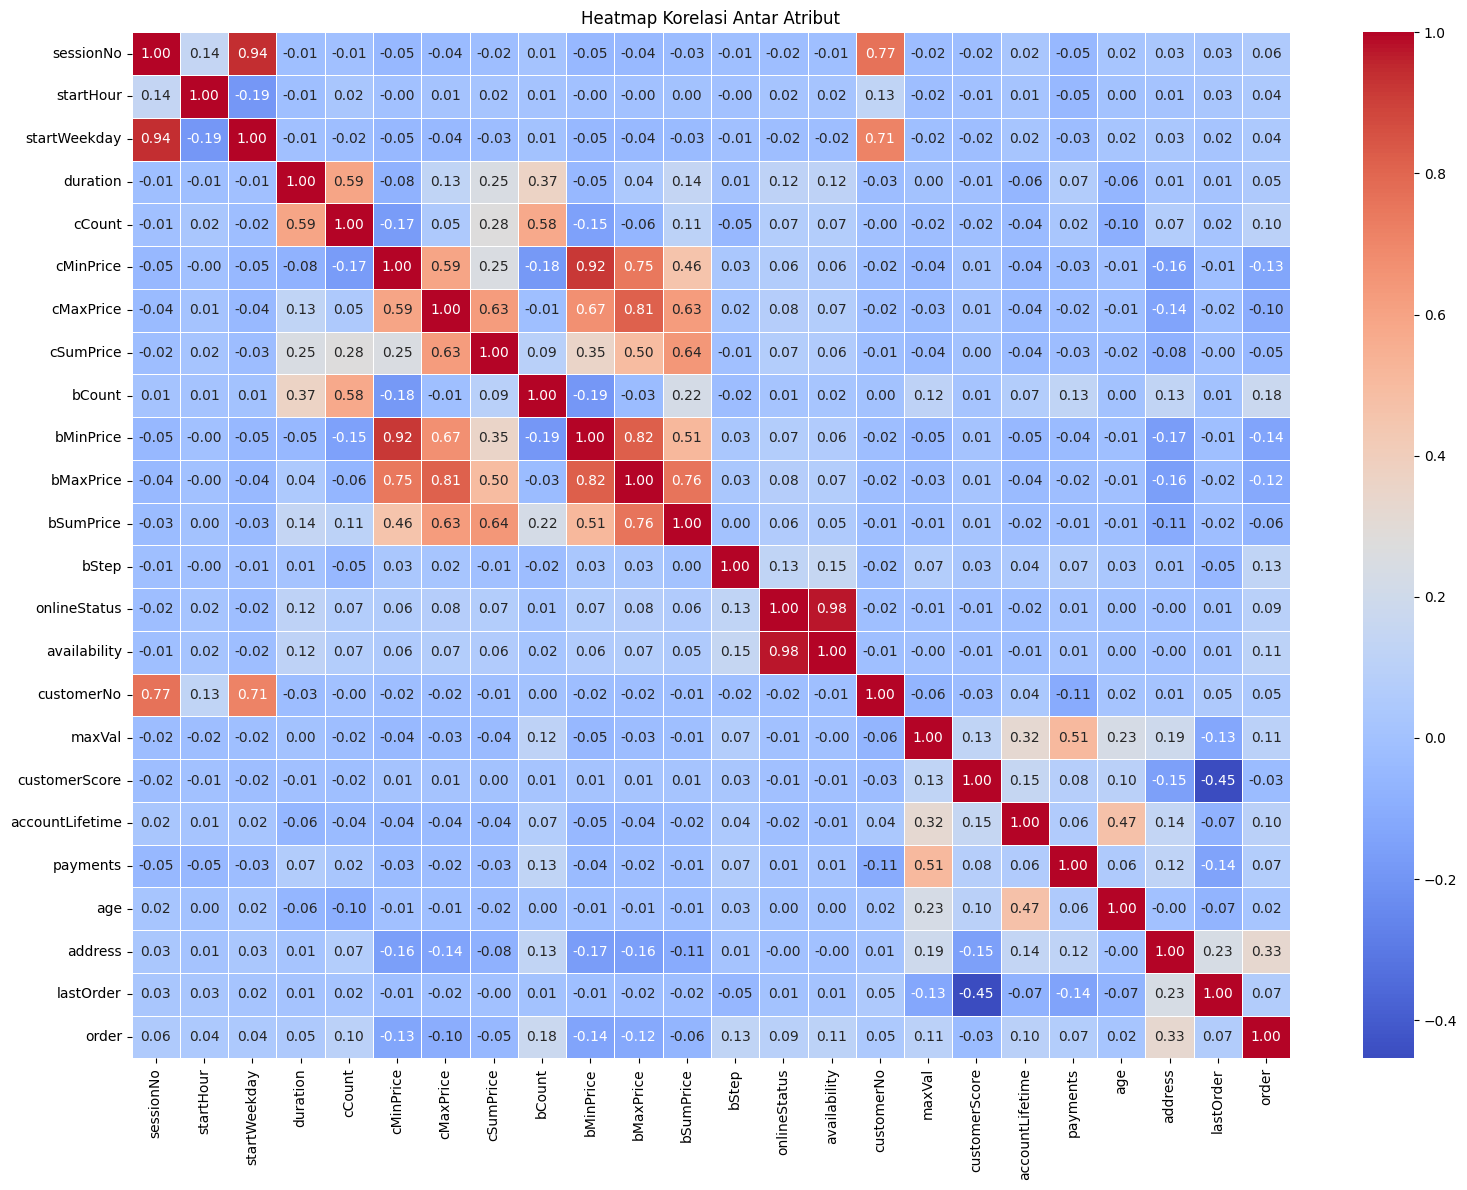

In [8]:
correlation_matrix = df_transact_train.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Atribut')
plt.tight_layout()
plt.show()


Menghapus kolom 'cMinPrice', 'cMaxPrice', dan 'cSumPrice' dari DataFrame untuk menyederhanakan analisis atau meningkatkan efisiensi model machine learning,karena kolom-kolom ini mungkin dianggap kurang relevan, memiliki informasi yang tumpang tindih dengan kolom lain, atau tidak memiliki hubungan yang kuat dengan target variabel.

In [9]:
df_transact_train.drop(columns=['cMinPrice', 'cMaxPrice', 'cSumPrice'], inplace=True)

df_transact_train


,sessionNo,startHour,startWeekday,duration,cCount,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,1,59.99,59.99,59.99,2.0,...,0,1.0,600.0,70.0,21.0,1.0,43.0,1,49.0,1
1,1,6,5,11.940,1,1,59.99,59.99,59.99,2.0,...,1,1.0,600.0,70.0,21.0,1.0,43.0,1,49.0,1
2,1,6,5,39.887,1,1,59.99,59.99,59.99,2.0,...,1,1.0,600.0,70.0,21.0,1.0,43.0,1,49.0,1
3,2,6,5,0.000,0,0,14.99,39.99,87.97,2.0,...,1,12045.0,1500.0,520.0,109.0,8.0,45.0,0,34.0,1
4,2,6,5,15.633,0,0,14.99,39.99,87.97,2.0,...,1,12045.0,1500.0,520.0,109.0,8.0,45.0,0,34.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429008,49998,18,7,5988.882,77,3,49.95,99.99,209.93,2.0,...,0,12045.0,1500.0,520.0,109.0,8.0,45.0,0,34.0,0
429009,49999,18,7,675.114,6,1,89.99,89.99,89.99,2.0,...,0,25038.0,1500.0,520.0,109.0,0.0,24.0,1,4.0,0
429010,49999,18,7,715.341,7,1,89.99,89.99,89.99,1.0,...,1,25038.0,1500.0,520.0,109.0,0.0,24.0,1,4.0,0
429011,50000,18,7,0.000,1,1,6.99,6.99,6.99,2.0,...,0,47.0,300.0,537.0,5.0,0.0,53.0,1,34.0,0


### 3. Pembuatan model

Setelah pre-processing dan data exploration selesai dilakukan, buat model klasifikasi dengan dataset yang sudah disediakan. 

In [10]:
# import seluruh library yang dibutuhkan untuk membuat model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # import library untuk pemodelan dengan Algoritma Random Forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
%pip install xgboost # install xgboost
import xgboost as xgb # import library xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score # import RMSE dan mse untuk evaluasi model
from sklearn.model_selection import GridSearchCV # import GridSearchCV untuk menetapkan parameter
from xgboost import plot_importance
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Pisahkan fitur (X) dan target (y) dengan menjadikan semua kolom kecuali 'order' sebagai fitur dan 'order' sebagai target untuk prediksi, membagi data menjadi pelatihan (training) dan pengujian (testing) dengan 30% data sebagai testing dan memastikan pembagian konsisten menggunakan `random_state=42`.

In [11]:
x = df_transact_train.drop(columns=['order'])
y = df_transact_train['order']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Membuat dan melatih model Random Forest dengan 10 decision tree, lalu mengevaluasi performa model melalui confusion matrix, classification report, dan accuracy score untuk memahami akurasi prediksi, distribusi kesalahan, serta metrik evaluasi lainnya.

In [12]:
model_Rdf = RandomForestClassifier(n_estimators=10, random_state=42)
model_Rdf.fit(x_train, y_train)

y_rdf_pred = model_Rdf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rdf_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_rdf_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_rdf_pred))

Confusion Matrix:
[[35033  6662]
 [ 6878 80131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     41695
           1       0.92      0.92      0.92     87009

    accuracy                           0.89    128704
   macro avg       0.88      0.88      0.88    128704
weighted avg       0.89      0.89      0.89    128704


Accuracy Score: 0.894797364495276


Membuat model dengan algoritma xgboost sebagai perbandingan dengan algoritma sebelumnya.

In [13]:
# membuat model xgb
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.4842352493654257
R²: -0.07065298992885238


Menampilkan plot untuk melihat feature importance pada model xgboost

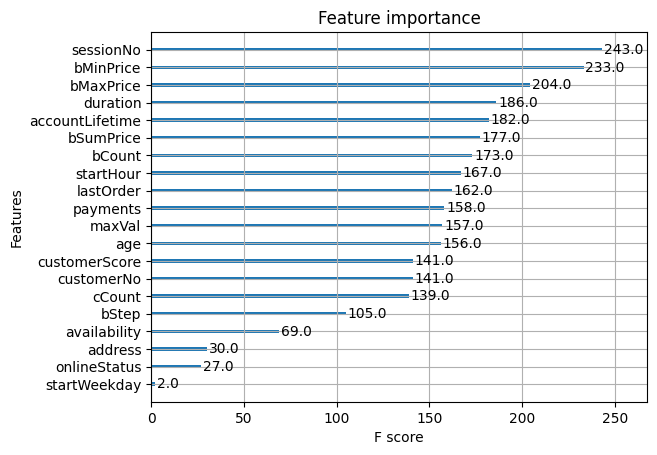

In [14]:
plot_importance(model_xgb)
plt.show()


Setelah model ditraining dan evaluasi performa model melalui confusion matrix, classification report, dan accuracy

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rdf_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[35033  6662]
 [ 6878 80131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58     41695
           1       0.79      0.90      0.84     87009

    accuracy                           0.77    128704
   macro avg       0.74      0.69      0.71    128704
weighted avg       0.76      0.77      0.75    128704


Accuracy Score: 0.765516223272004


## C. Kesimpulan

Setelah dilakukan pembersihan dan transformasi data, nilai yang hilang telah diganti dengan median untuk kolom numerik dan modus untuk kolom target. Kolom-kolom yang tidak relevan seperti `cMinPrice`, `cMaxPrice`, dan `cSumPrice` telah dihapus untuk menyederhanakan analisis dan mengurangi dimensi data. Data kemudian dibagi menjadi data pelatihan dan pengujian, dan digunakan untuk melatih dua model: Random Forest dan XGBoost. Model Random Forest dievaluasi menggunakan confusion matrix, classification report, dan accuracy score, yang menunjukkan bahwa model cukup baik dalam memprediksi target meskipun masih ada potensi perbaikan, misalnya melalui pencarian parameter optimal. Untuk model XGBoost, dilakukan pencarian grid search untuk mengoptimalkan hyperparameter dan meningkatkan kinerja, dengan evaluasi menggunakan RMSE dan R². Visualisasi pentingnya fitur dilakukan untuk membantu memahami kontribusi setiap fitur dalam prediksi. Secara keseluruhan, proses ini berhasil mengolah data menjadi siap digunakan untuk analisis lebih lanjut dan menghasilkan model yang cukup andal, meskipun masih ada ruang untuk perbaikan lebih lanjut dalam pemilihan model atau tuning parameter.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65c79be-89a6-461e-b128-0bc03e0caaaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>